##### Test: Can player position adaptability be quantified appropriately?

In [1]:
import pandas as pd

In [2]:
# load data
appearances = pd.read_csv('supporting-files/baseballdatabank-2017/core/Appearances.csv')
appearances.head()

,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,...,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,1871,TRO,NaN,abercda01,1,NaN,1,1,0,0,...,0,0,1,0,0,0,0,NaN,NaN,NaN
1,1871,RC1,NaN,addybo01,25,NaN,25,25,0,0,...,22,0,3,0,0,0,0,NaN,NaN,NaN
2,1871,CL1,NaN,allisar01,29,NaN,29,29,0,0,...,2,0,0,0,29,0,29,NaN,NaN,NaN
3,1871,WS3,NaN,allisdo01,27,NaN,27,27,0,27,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1871,RC1,NaN,ansonca01,25,NaN,25,25,0,5,...,2,20,0,1,0,0,1,NaN,NaN,NaN


Player adaptability score is calculated by looking at the nine possible positions field-positions in baseball. It is three minus the unbiased estimator for standard deviation divided by the mean.

$$\text{Player Position Adaptability } = 3-\frac{\hat{s}}{\mu}$$

In [3]:
# create player position adaptability score
positions = ['G_p','G_c','G_1b','G_2b','G_3b','G_ss','G_lf','G_cf','G_rf']
appearances['adapt_score'] = 3 - round((appearances[positions].std(axis=1, ddof=1)/appearances[positions].mean(axis=1)),4)
appearances.head()

,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,...,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr,adapt_score
0,1871,TRO,NaN,abercda01,1,NaN,1,1,0,0,...,0,1,0,0,0,0,NaN,NaN,NaN,0.0000
1,1871,RC1,NaN,addybo01,25,NaN,25,25,0,0,...,0,3,0,0,0,0,NaN,NaN,NaN,0.3805
2,1871,CL1,NaN,allisar01,29,NaN,29,29,0,0,...,0,0,0,29,0,29,NaN,NaN,NaN,0.2111
3,1871,WS3,NaN,allisdo01,27,NaN,27,27,0,27,...,0,0,0,0,0,0,NaN,NaN,NaN,0.0000
4,1871,RC1,NaN,ansonca01,25,NaN,25,25,0,5,...,20,0,1,0,0,1,NaN,NaN,NaN,0.9841


In [4]:
# check for adaptabilty scores that were not computed
# note, if player never made on-field appearance(like for pinch hitters), formula will be undefined
rows_count = len(appearances.index)
adapt_nan = appearances['adapt_score'].isnull().sum()
print("Rows in the table: %s" %rows_count)
print("Player position adaptability scores not computed: %s" %adapt_nan)

Rows in the table: 102761
Player position adaptability scores not computed: 1427


In [5]:
# remove any players who never made on-field appearances
appearances.dropna(subset=['adapt_score'], inplace=True)
appearances.head()

,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,...,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr,adapt_score
0,1871,TRO,NaN,abercda01,1,NaN,1,1,0,0,...,0,1,0,0,0,0,NaN,NaN,NaN,0.0000
1,1871,RC1,NaN,addybo01,25,NaN,25,25,0,0,...,0,3,0,0,0,0,NaN,NaN,NaN,0.3805
2,1871,CL1,NaN,allisar01,29,NaN,29,29,0,0,...,0,0,0,29,0,29,NaN,NaN,NaN,0.2111
3,1871,WS3,NaN,allisdo01,27,NaN,27,27,0,27,...,0,0,0,0,0,0,NaN,NaN,NaN,0.0000
4,1871,RC1,NaN,ansonca01,25,NaN,25,25,0,5,...,20,0,1,0,0,1,NaN,NaN,NaN,0.9841


In [6]:
# check again for adaptabilty scores that were not computed
rows_count = len(appearances.index)
adapt_nan = appearances['adapt_score'].isnull().sum()
print("Rows in the table: %s" %rows_count)
print("Player position adaptability scores not computed: %s" %adapt_nan)

Rows in the table: 101334
Player position adaptability scores not computed: 0


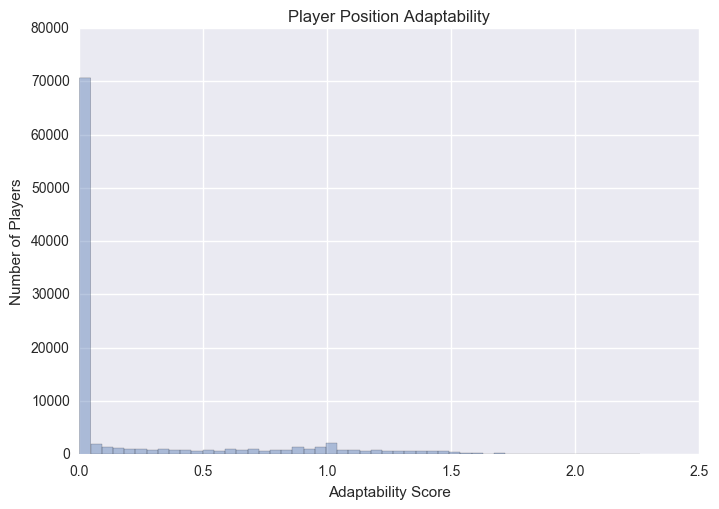

In [7]:
# plot
import seaborn as sns
import matplotlib.pyplot as plt

adapt_score = appearances['adapt_score']
fig, ax = plt.subplots()
sns.distplot(adapt_score, ax=ax, kde=False)
ax.set_title("Player Position Adaptability")
ax.set_ylabel("Number of Players")
ax.set_xlabel("Adaptability Score")

plt.show()